In [9]:
# import the dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data collection and processing

In [13]:
# DATASET

df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
# Date    -> The date of the data point
# SPX     -> S&P 500 index price (stock market)
# GLD     -> Gold price (target for prediction)
# USO     -> Oil price (US Oil Fund)
# SLV     -> Silver price
# EUR/USD -> Exchange rate between Euro and US Dollar

In [15]:
df.shape

(2290, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
# missing values

df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [28]:
# positive and negative correlation

# Positive correlation -> Two variables move in the same direction (both increase or decrease together)
# Negative correlation -> Two variables move in opposite directions (one increases, the other decreases)

In [26]:
# Select only numeric columns
numeric_df = df[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']]

cor = numeric_df.corr()

<Axes: >

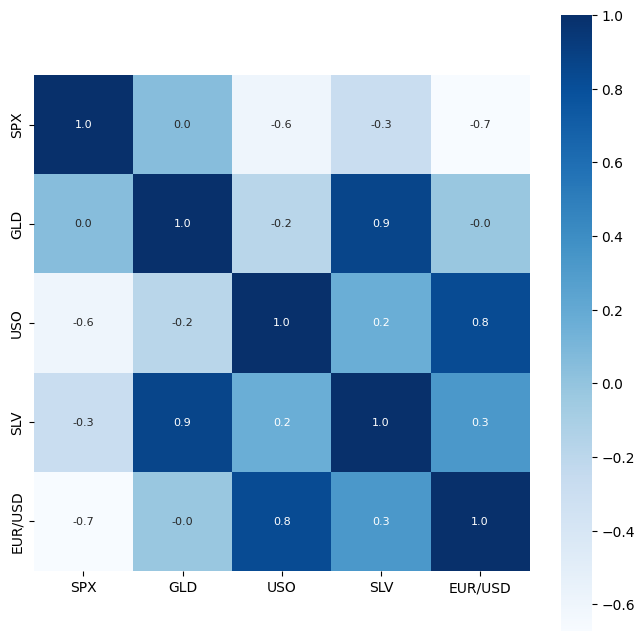

In [29]:
plt.figure(figsize = (8, 8))
sns.heatmap(cor, cbar = True, square=True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap="Blues")

In [30]:
# correlation values of GLD

print(cor["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


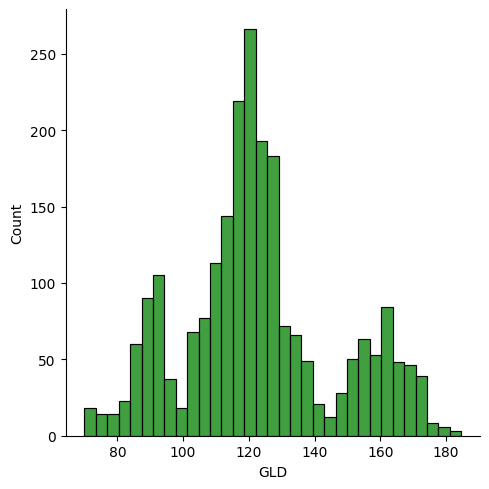

In [31]:
# density of GLD

sns.displot(df["GLD"], color = "green")

In [34]:
# splitting the features and the target.

x = df.drop(["Date", "GLD"], axis = 1)
y = df["GLD"]

In [35]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# train test split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

# Model training : Random Forest Regressor

In [42]:
re = RandomForestRegressor(n_estimators=100)

In [43]:
# model training

In [44]:
re.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# model evaluation

In [45]:
# prediction of the test data

test_pred = re.predict(X_test)

In [47]:
# this are the values predicted by our model.

print(test_pred)

[168.79459947  82.10229982 115.70869937 127.55030057 120.85780103
 154.52059811 150.15649837 126.23859997 117.62889892 126.02470056
 116.74130074 172.47530076 141.73139791 167.76659835 115.21470027
 117.4210004  138.59750321 170.07020116 159.69250253 158.20369834
 154.88899989 125.32130002 176.09609873 156.93500307 125.26230023
  93.86009974  78.63479978 120.779      119.08549935 167.40530078
  88.46039968 125.16220021  91.08770061 117.68569957 121.03259955
 136.27310065 115.46230112 115.21440063 148.82690019 107.40370049
 104.43280221  87.171198   126.50840053 117.84030007 152.62939897
 119.6845998  108.3447     107.90829847  93.15050051 127.18859764
  75.24390035 113.51249898 121.32690007 111.3055995  118.87809907
 120.61129972 159.13310052 167.75800032 147.10739667  85.77769876
  94.25490062  86.75509855  90.57709998 118.92230097 126.51320067
 127.59269986 168.90420022 122.3357995  117.2635989   98.4680001
 167.69600027 143.2290984  132.35950263 121.13790257 120.43579956
 119.745801

# R Squared Error

In [51]:
error_score = metrics.r2_score(Y_test, test_pred)
print("R-squared error : ", error_score * 100) 

R-squared error :  98.85825744277265


# comparing the actual and predicted values in plot.

In [53]:
Y_test = list(Y_test)

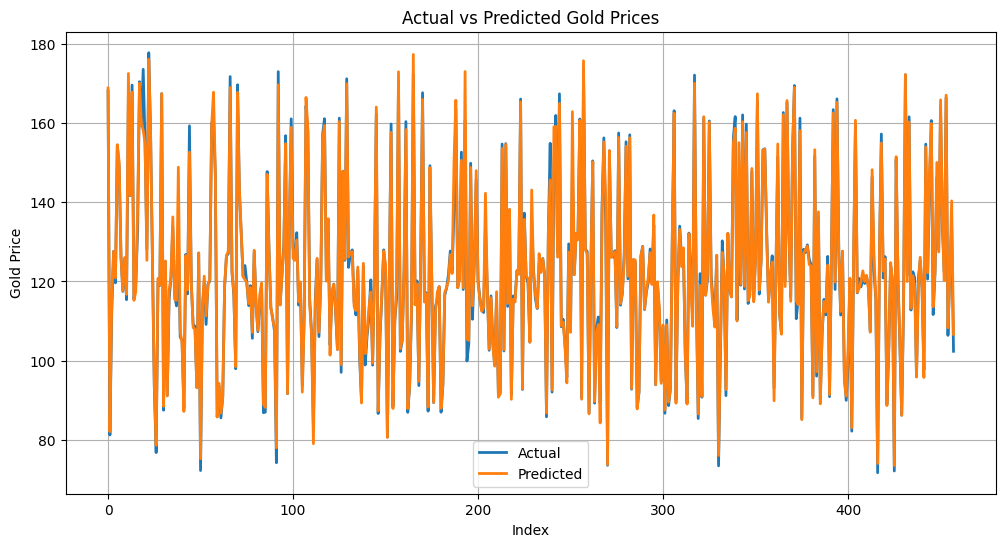

In [57]:
plt.figure(figsize=(12, 6))

plt.plot(Y_test, label='Actual', linewidth=2)
plt.plot(test_pred, label='Predicted', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
import numpy as np
import joblib

# Load model (if saved)
model = joblib.load("gold_price_model")

# Load scaler if used
# scaler = joblib.load("scaler.pkl")

# Small test data
sample = np.array([[4500.23, 180.50, 65.20, 23.10, 1.08]])

# If a scaler was used:
# sample = scaler.transform(sample)

pred = model.predict(sample)

print("Predicted Gold Price:", pred[0])


FileNotFoundError: [Errno 2] No such file or directory: 'gold_price_model.pkl'